# ResNet:

### Import the required packages:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

### Load the dataset:

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Add padding to the images:

In [3]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

### Expand the dimensions of the images:

In [4]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

### Repeating the elements:

In [5]:
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

### Splitting data for the validation set:

In [6]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

### Creating the model:

In [7]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet',
                                             include_top = False,
                                             input_shape = (32,32,3))
for layer in base_model.layers:
    layer.trainable = False
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)
head_model = Model(inputs = base_model.input, outputs = predictions)

234698864/234698864 [==============================] - 1s 0us/step


In [8]:
head_model.compile(optimizer='adam', metrics=['accuracy'],
 loss=losses.sparse_categorical_crossentropy)

### Training the model:

In [9]:
history = head_model.fit(x_train, y_train,
batch_size=64,
epochs=5,
validation_data=(x_val, y_val))

Epoch 1/5
907/907 [==============================] - 416s 451ms/step - loss: 0.9014 - accuracy: 0.7024 - val_loss: 0.4852 - val_accuracy: 0.8645
Epoch 2/5
907/907 [==============================] - 411s 453ms/step - loss: 0.5867 - accuracy: 0.8089 - val_loss: 0.4280 - val_accuracy: 0.8735
Epoch 3/5
907/907 [==============================] - 411s 453ms/step - loss: 0.5102 - accuracy: 0.8346 - val_loss: 0.3861 - val_accuracy: 0.8850
Epoch 4/5
907/907 [==============================] - 411s 453ms/step - loss: 0.4539 - accuracy: 0.8517 - val_loss: 0.2886 - val_accuracy: 0.9205
Epoch 5/5
907/907 [==============================] - 412s 454ms/step - loss: 0.4154 - accuracy: 0.8631 - val_loss: 0.2652 - val_accuracy: 0.9365


### Plotting accuracy and losses:

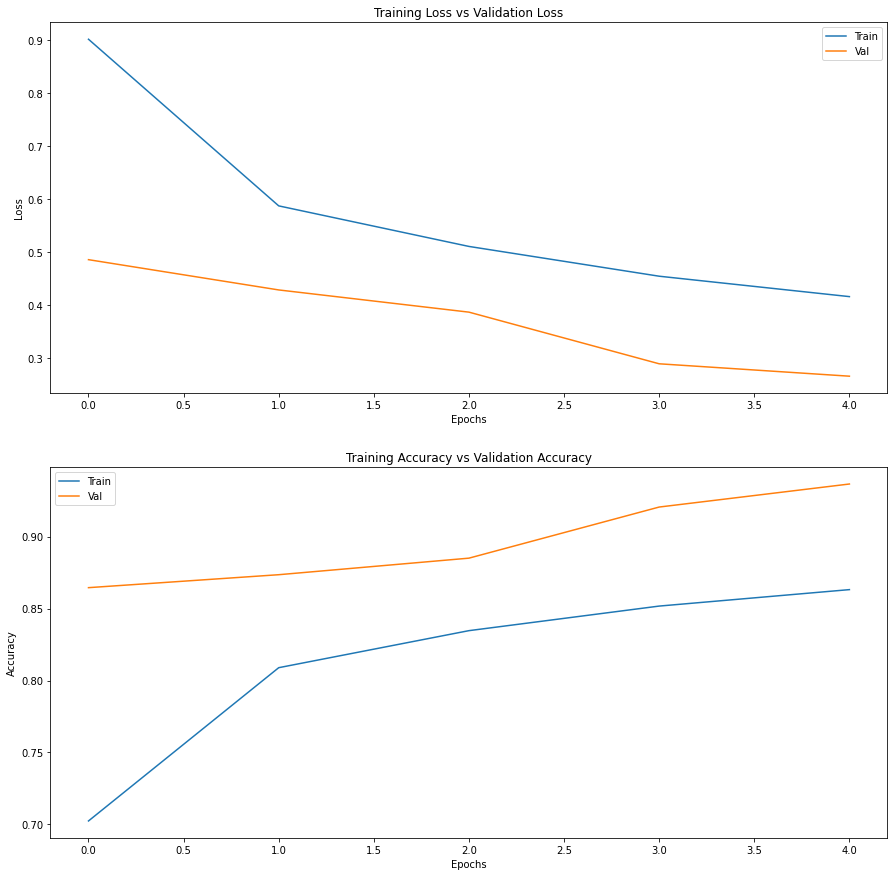

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

### Printing the metrics:

In [11]:
head_model.evaluate(x_test, y_test)

313/313 [==============================] - 77s 246ms/step - loss: 0.3601 - accuracy: 0.8786


[0.3600934147834778, 0.878600001335144]